In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

from statsmodels.stats.diagnostic import lilliefors

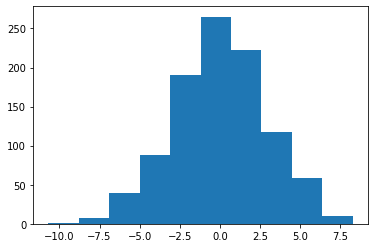

In [2]:
# Set the parameters
numData = 1000
myMean = 0
mySD = 3

# To get reproducable values, I provide a seed value
np.random.seed(1234)   

# Generate and show random data
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]
plt.hist(data)
plt.show()

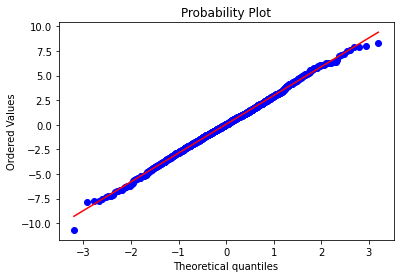

p-values for all 1000 data points: ----------------
Omnibus               0.913684
Shapiro-Wilk          0.558474
Lilliefors            0.671161
Kolmogorov-Smirnov    0.892921
dtype: float64
p-values for the first 100 data points: ----------------
Omnibus               0.004530
Shapiro-Wilk          0.047102
Lilliefors            0.207260
Kolmogorov-Smirnov    0.619977
dtype: float64


/Users/patrickhu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/Users/patrickhu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/Users/patrickhu/opt/anaconda3/envs/data_analysis/lib/python3.7/site-packages/statsmodels/stats/_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [5]:
_ = stats.probplot(data, plot=plt)
plt.show()

pVals = pd.Series()
pFewVals = pd.Series()

# The scipy normaltest is based on D-Agostino and Pearsons test that
# combines skew and kurtosis to produce an omnibus test of normality.
_, pVals['Omnibus'] = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

# Shapiro-Wilk test
_, pVals['Shapiro-Wilk'] = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)

# Or you can check for normality with Lilliefors-test
_, pVals['Lilliefors'] = lilliefors(data)
_, pFewVals['Lilliefors'] = lilliefors(fewData)

# Alternatively with original Kolmogorov-Smirnov test
_, pVals['Kolmogorov-Smirnov']    = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')

print('p-values for all {0} data points: ----------------'.format(len(data)))
print(pVals)
print('p-values for the first 100 data points: ----------------')
print(pFewVals)

In [4]:
if pVals['Omnibus'] > 0.05:
    print('Data are normally distributed')

Data are normally distributed
